# Ayush Singh Rawat
# 191302013
# Btech CSE MLAI

project - Marketing


step 1 - define reseach goal 
infer relationship betwwen sales and three media budgets : tv,newspaper and radio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wot = pd.read_csv('Advertising.csv')
wot

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Understanding data 

In [4]:
wot.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
wot.shape

(200, 5)

In [6]:
wot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
wot.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Explorlatory data analysis (EDA)

In [8]:
pd.set_option('precision',2)
wot.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.97,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [9]:
(wot==0).sum(axis=0)

Unnamed: 0    0
TV            0
Radio         1
Newspaper     0
Sales         0
dtype: int64

relationship between predictor and response

1.relation between sales and TV

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


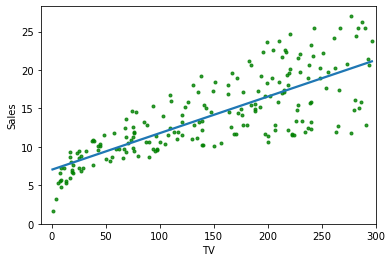

In [10]:
sns.regplot(wot.TV, wot.Sales, ci=None, order =1, scatter_kws = {'color':'g','s':9})
plt.xlim(-10,300)
plt.ylim(bottom=0)
plt.show()

2.Relation between sales and radio

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


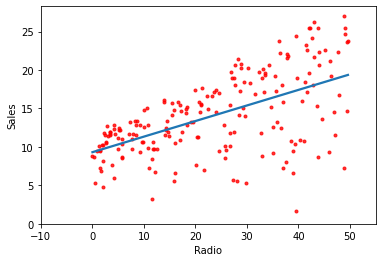

In [11]:
sns.regplot(wot.Radio, wot.Sales, ci=None, order=1, scatter_kws={'color':'r','s':9})
plt.xlim(-10,55)
plt.ylim(bottom=0)
plt.show()

3. relationship between sales and newspaper

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

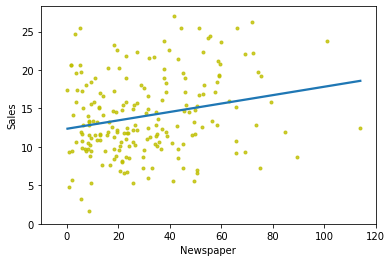

In [12]:
sns.regplot(wot.Newspaper, wot.Sales, order =1, ci= None, scatter_kws={'color':'y','s':9})
plt.xlim(-10,120)
plt.ylim(bottom=0)
plt.plot()

Data normalization

In [13]:
from sklearn.preprocessing import scale
X = scale(wot.TV, with_mean = True, with_std=False).reshape(-1,1)
Y = wot.Sales

In [14]:
X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [15]:
X.mean()

1.0089706847793422e-14

In [16]:
X.std()

85.63933175679269

Liner regression (scaled data)- Data modeling steps

In [17]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression() # initiazed model
regr.fit(X,Y)   #after initzed we fit x and y

LinearRegression()

In [18]:
regr.intercept_

14.0225

In [19]:
regr.coef_

array([0.04753664])

In [20]:
min_rss = np.sum((regr.intercept_ + regr.coef_*X - Y.values.reshape(-1,1))**2)
min_rss

2102.5305831313512

LinearRegression ( unscale data)

In [21]:
regr = skl_lm.LinearRegression()
X = wot.TV.values.reshape(-1,1)
y = wot.Sales
regr.fit(X,y)


LinearRegression()

In [22]:
regr.intercept_

7.032593549127695

In [23]:
regr.coef_

array([0.04753664])

In [24]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)
min_rss

2102.5305831313512

In [25]:
mse = min_rss/len(y)
mse

10.512652915656757

In [26]:
#R-Sq using Sklearn
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred) 

0.611875050850071

In [27]:
mean_squared_error(y, Sales_pred) #using sklearn

10.512652915656757

Resgression using statsmodel

In [37]:
import statsmodels.formula.api as smf
est = smf.ols('Sales ~ TV', wot).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 08 May 2021   Prob (F-statistic):           1.47e-42
Time:                        10:51:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression RSS and MSE

In [38]:
est.params 

Intercept    7.03
TV           0.05
dtype: float64

In [40]:
#RSS
((wot.Sales - (est.params[0] + est.params[1] * wot.TV))** 2).sum()


2102.530583131351

In [42]:
#MSE
((wot.Sales - (est.params[0] + est.params[1]*wot.TV))** 2).sum()/len(wot.Sales)
    

10.512652915656753

SINGLE LINEAR REGRESSION

In [43]:
est = smf.ols('Sales ~ Radio', wot).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [44]:
est = smf.ols('Sales ~ Newspaper', wot).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


MULTIPLE LINEAR REGRESSION

In [46]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', wot).fit()
In [55]: est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 08 May 2021   Prob (F-statistic):           1.58e-96
Time:                        10:58:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Correlation Matrix
wot.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.00,0.02,-0.11,-0.15,-0.05
TV,0.02,1.00,0.05,0.06,0.78
Radio,-0.11,0.05,1.00,0.35,0.58
Newspaper,-0.15,0.06,0.35,1.00,0.23
Sales,-0.05,0.78,0.58,0.23,1.00


In [ ]:
#pip install seaborn
#pip install --upgrade --no-deps statsmodel
#pip install patsy